In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("data.tsv", sep='\t', header=0, quoting=3, encoding='ISO-8859–1')

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130897 entries, 0 to 130896
Data columns (total 13 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tconst          130897 non-null  object 
 1   titleType       130897 non-null  object 
 2   primaryTitle    130897 non-null  object 
 3   startYear       130897 non-null  float64
 4   runtimeMinutes  130897 non-null  float64
 5   genres          130897 non-null  object 
 6   averageRating   130897 non-null  float64
 7   numVotes        130897 non-null  float64
 8   tmdbId          130897 non-null  float64
 9   overview        130897 non-null  object 
 10  tmdbVoteAvg     130897 non-null  float64
 11  poster          130897 non-null  object 
 12  score           0 non-null       float64
dtypes: float64(7), object(6)
memory usage: 13.0+ MB


In [3]:
df.columns

Index(['tconst', 'titleType', 'primaryTitle', 'startYear', 'runtimeMinutes',
       'genres', 'averageRating', 'numVotes', 'tmdbId', 'overview',
       'tmdbVoteAvg', 'poster', 'score'],
      dtype='object')

TitleTypes

In [4]:
print(df['titleType'].unique())

['tvSeries' 'movie' 'tvMovie' 'tvMiniSeries' 'tvShort']


Number of tv series:  14571
Number of movies:  116326


<Axes: xlabel='titleType', ylabel='count'>

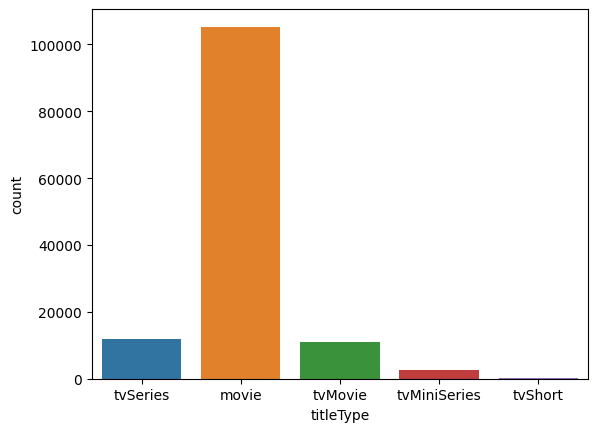

In [5]:
number_of_shows=df.titleType.str.contains('tvSeries').value_counts()[True]+df.titleType.str.contains('tvShort').value_counts()[True]+df.titleType.str.contains('tvMiniSeries').value_counts()[True]
number_of_movies=df.titleType.str.contains('movie').value_counts()[True]+df.titleType.str.contains('tvMovie').value_counts()[True]
print("Number of tv series: ", number_of_shows)
print("Number of movies: ", number_of_movies)
sns.countplot(x ='titleType', data = df) 

startYear

Min:  1894.0
Mean:  1997.9062239776313
Max:  2023.0
Std:  23.407690988164216


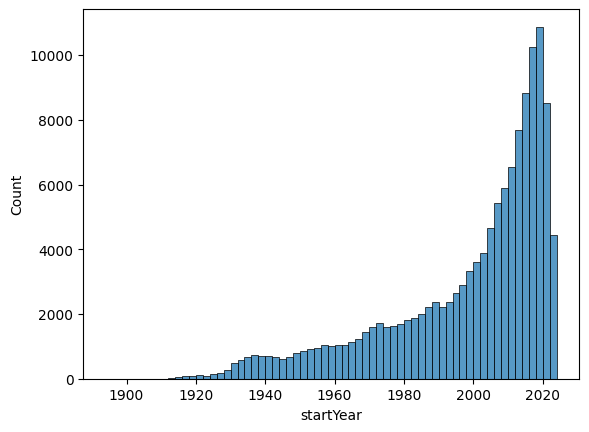

In [6]:
print("Min: ", np.min(df.startYear))
print("Mean: ",np.mean(df.startYear))
print("Max: ", np.max(df.startYear))
print("Std: ", np.std(df.startYear))
sns.histplot(data=df, x="startYear", binwidth=2);

runtimeMinutes  

Mean:  94.16542013949899
Min:  1.0
Max:  400.0
Std:  32.44213661147364


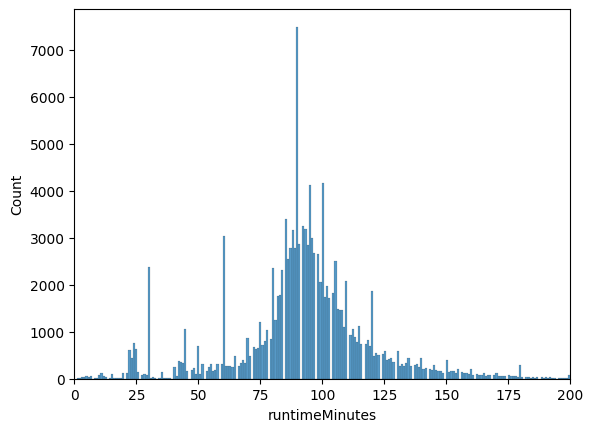

In [7]:
print("Mean: ",np.mean(df.runtimeMinutes))
print("Min: ", np.min(df.runtimeMinutes))
print("Max: ", np.max(df.runtimeMinutes))
print("Std: ", np.std(df.runtimeMinutes))
g=sns.histplot(df, x="runtimeMinutes");
g.set_xlim(0, 200);

In [8]:
#df[df['runtimeMinutes'] >= 300]

Genres

In [9]:
print("Number of genres: ",len(df['genres'].unique()))
print(df['genres'].unique())

Number of genres:  28
['Drama' 'Reality-TV' 'Adventure' 'Documentary' 'Comedy' 'Mystery'
 'Action' 'Sci-Fi' 'Fantasy' 'Romance' 'Biography' 'Crime' 'Western'
 'Horror' 'History' 'Family' 'Thriller' 'Music' 'Musical' 'Animation'
 'Film-Noir' 'War' 'News' 'Sport' 'Adult' 'Talk-Show' 'Game-Show' 'Short']


In [10]:
df.groupby(['genres'])['genres'].count()

genres
Action         17936
Adult            440
Adventure       6846
Animation       2343
Biography       4777
Comedy         32197
Crime           9372
Documentary     8540
Drama          34171
Family           775
Fantasy          647
Film-Noir         33
Game-Show        201
History          123
Horror          6172
Music            147
Musical          225
Mystery          766
News              50
Reality-TV       491
Romance          883
Sci-Fi           483
Short              6
Sport             31
Talk-Show         63
Thriller        1973
War               77
Western         1129
Name: genres, dtype: int64

In [11]:
df.groupby(['startYear'])['startYear'].count()

startYear
1894.0       1
1897.0       1
1903.0       1
1906.0       1
1910.0       1
          ... 
2019.0    5419
2020.0    4241
2021.0    4293
2022.0    4022
2023.0     428
Name: startYear, Length: 118, dtype: int64

averageRating

Mean:  6.075414257011237
Min:  1.0
Max:  9.7
Std:  1.2586009985606248


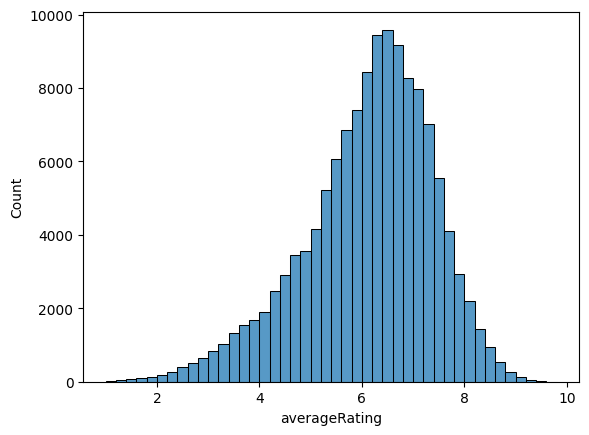

In [12]:
print("Mean: ",np.mean(df.averageRating))
print("Min: ", np.min(df.averageRating))
print("Max: ", np.max(df.averageRating))
print("Std: ", np.std(df.averageRating))
sns.histplot(data=df, x="averageRating", binwidth=0.2);

numVotes

Mean:  8895.018976752714
Min:  100.0
Max:  2720167.0
Std:  53957.96990979749


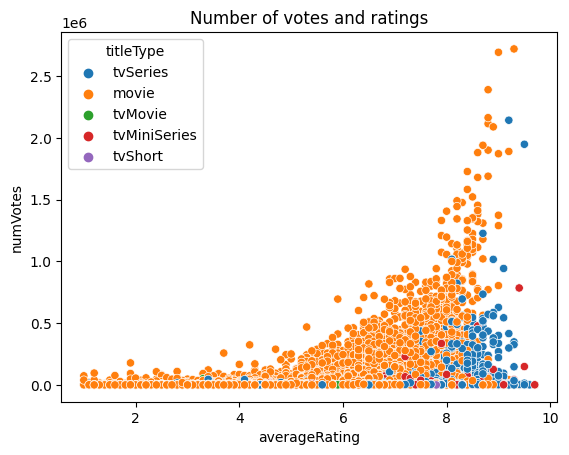

In [13]:
print("Mean: ",np.mean(df.numVotes))
print("Min: ", np.min(df.numVotes))
print("Max: ", np.max(df.numVotes))
print("Std: ", np.std(df.numVotes))
#sns.displot(df.numVotes);
sns.scatterplot(data=df, y="numVotes", x="averageRating", hue="titleType");

plt.title("Number of votes and ratings");

In [14]:
(df.averageRating>9).sum()

112

tmdbVoteAvg

Mean:  6.003396899852556
Min:  0.5
Max:  10.0
Std:  1.3787028409014748


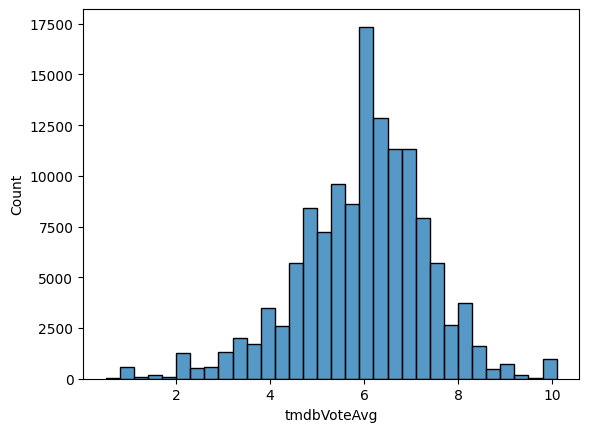

In [15]:
print("Mean: ",np.mean(df.tmdbVoteAvg))
print("Min: ", np.min(df.tmdbVoteAvg))
print("Max: ", np.max(df.tmdbVoteAvg))
print("Std: ", np.std(df.tmdbVoteAvg))
sns.histplot(data=df, x="tmdbVoteAvg", binwidth=0.3);

poster

In [16]:
print("Number of posters missing: ",len(df[df['poster'].str.contains('None')]))

Number of posters missing:  0


In [17]:
df

,tconst,titleType,primaryTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,tmdbId,overview,tmdbVoteAvg,poster,score
0,tt11198330,tvSeries,House of the Dragon,2022.0,60.0,Drama,8.5,321000.0,94997.0,"""""""""""""""""""""""""""""""The Targaryen dynasty is at the...",8.477,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
1,tt2085059,tvSeries,Black Mirror,2011.0,60.0,Drama,8.8,565000.0,42009.0,"""""""""""""""""""""""""""""""A contemporary British re-worki...",8.314,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
2,tt11823088,tvSeries,100 Humans,2020.0,40.0,Reality-TV,5.8,4000.0,100429.0,"""""""""""""""""""""""""""""""One hundred hardy souls from di...",6.404,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
3,tt12809988,tvSeries,Sweet Tooth,2021.0,55.0,Adventure,7.8,55000.0,103768.0,"""""""""""""""""""""""""""""""On a perilous adventure across ...",7.937,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
4,tt8179402,tvSeries,Fate: The Winx Saga,2021.0,53.0,Adventure,6.8,51000.0,97175.0,"""""""""""""""""""""""""""""""The coming-of-age journey of fi...",8.238,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
130892,tt9914942,movie,Life Without Sara Amat,2019.0,74.0,Drama,6.7,172.0,598553.0,"Pep, a 13-year-old boy, is in love with a girl...",7.700,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
130893,tt9914972,movie,Blind Ambition,2021.0,96.0,Documentary,7.1,258.0,822258.0,The inspiring story of four Zimbabwean men who...,7.600,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
130894,tt9916190,movie,Safeguard,2020.0,95.0,Action,3.7,242.0,633490.0,When a Japanese restaurant is extorted by the ...,6.500,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN
130895,tt9916270,movie,Il talento del calabrone,2020.0,84.0,Thriller,5.8,1410.0,670203.0,"Dj Steph is a young radio deejay on the rise, ...",6.388,https://www.themoviedb.org/t/p/w600_and_h900_b...,NaN


Scores

In [18]:
number_of_likes=(df.score>0).sum()
number_of_dislikes=(df.score==0).sum()
print("Liked: ", number_of_likes)
print("Disliked: ", number_of_dislikes)

Liked:  0
Disliked:  0


In [19]:
df.iloc[:,-1:]=np.nan